In [1]:
import pickle
import numpy as np
import pandas as pd
import os
from copy import deepcopy
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.animation

import pypolo2

# Environment -- PINNS

In [2]:
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                #  "EffectOrientedGreedySpray",
                #  "NonmyonicLatticeSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]

# Average Suppression

In [6]:
# 累计pm2.5控制总量,所有实验的平均值
strategy_sumsprayeffect = []
sche_step = 0
adaptive_step = 0
# teamsize
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_sumsprayeffect = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_sumsprayeffect = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            seed_sumsprayeffect.append(np.sum(data['spray_effect'])/400/48)
        variable_sumsprayeffect.append(np.mean(seed_sumsprayeffect))
        
    # numsource
    for i in range(5):
        comparing_variable = comparing_variables[1][i]
        team_size = 3
        sourcenum = sourcenums[i]
        seed_sumsprayeffect = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            seed_sumsprayeffect.append(np.sum(data['spray_effect'])/48/400)
        variable_sumsprayeffect.append(np.mean(seed_sumsprayeffect))
        
    strategy_sumsprayeffect.append(np.mean(variable_sumsprayeffect))
print(strategy_sumsprayeffect)

[3.2630437755638786, 2.86185365055276, 2.3471333489390647, 1.796752554964969e-05]


# Average Pollution Concentration

In [5]:
# 区域平均pm2.5浓度,所有实验的平均值
strategy_meanpollution = []
# teamsize
sche_step = 0
adaptive_step = 0
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_meanpollution = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_meanpollution = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            time_meanpollution = []
            for i in range(48):
                if i >= 24:
                    mean_env = np.mean(data['truth_env'][i])
                    time_meanpollution.append(mean_env)
            seed_meanpollution.append(np.mean(time_meanpollution))
        variable_meanpollution.append(np.mean(seed_meanpollution))
        
    # numsource
    for i in range(5):
        comparing_variable = comparing_variables[1][i]
        team_size = 3
        sourcenum = sourcenums[i]
        seed_sumsprayeffect = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            for i in range(48):
                if i >= 24:
                    mean_env = np.mean(data['truth_env'][i])
                    time_meanpollution.append(mean_env)
            seed_meanpollution.append(np.mean(time_meanpollution))
        variable_meanpollution.append(np.mean(seed_meanpollution))
        
    strategy_meanpollution.append(np.mean(variable_meanpollution))
print(strategy_meanpollution)

[33.077575577111624, 40.832835731388926, 47.19795367316438, 94.22033446807441]


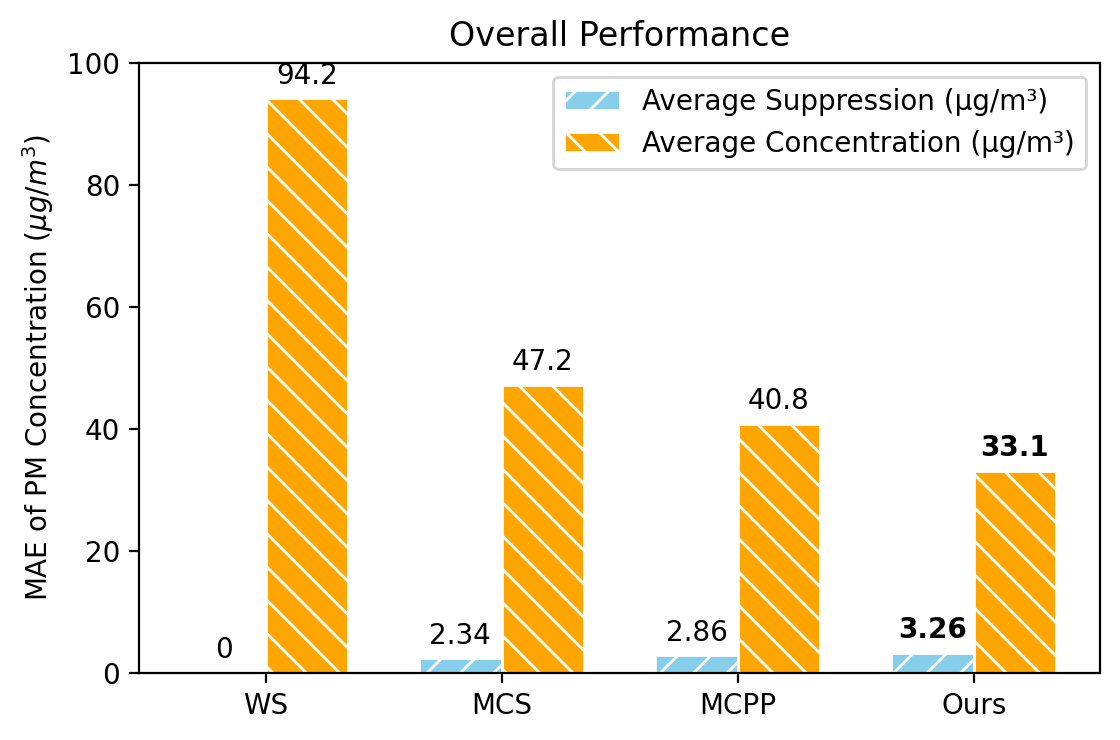

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['WS', 'MCS', 'MCPP', 'Ours']
Average_Suppression = [0, 2.34, 2.86, 3.26]
Average_Concentration = [94.2, 47.2, 40.8, 33.1]

x = np.arange(len(models))  
width = 0.35  

fig, ax = plt.subplots(figsize=(5.7, 3.8), dpi=200)
pm25_hatch = '//'
pm10_hatch = '\\\\'
edge_color = 'white'

for i in range(len(models)):
    ax.bar(x[i] - width/2, Average_Suppression[i], width, label='Average Suppression (μg/m³)' if i == 0 else "",
           color='skyblue', hatch=pm25_hatch, edgecolor=edge_color)
    ax.bar(x[i] + width/2, Average_Concentration[i], width, label='Average Concentration (μg/m³)' if i == 0 else "",
           color='orange', hatch=pm10_hatch, edgecolor=edge_color)

ax.set_ylabel('MAE of PM Concentration ($\mu{g}/m^3$)')
ax.set_title('Overall Performance')
ax.set_xticks(x)
ax.set_ylim([0, 100])
ax.set_xticklabels(models)
ax.legend()

def autolabel(values, offset):
    for i, value in enumerate(values):
        fontweight = 'bold' if models[i] == 'Ours' else 'normal'
        ax.annotate('{}'.format(value),
                    xy=(x[i] + offset, value),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight=fontweight)

autolabel(Average_Suppression, -width/2)
autolabel(Average_Concentration, width/2)

fig.tight_layout()

# plt.savefig("Overall_Performance.png", bbox_inches='tight')

C:\Users\Zijian\AppData\Local\Temp\ipykernel_23624\1465488661.py:35: UserWarning: Legend does not support handles for Legend instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend(legends, ['Average Suppression (μg/m³)', 'Average Concentration (μg/m³)'],


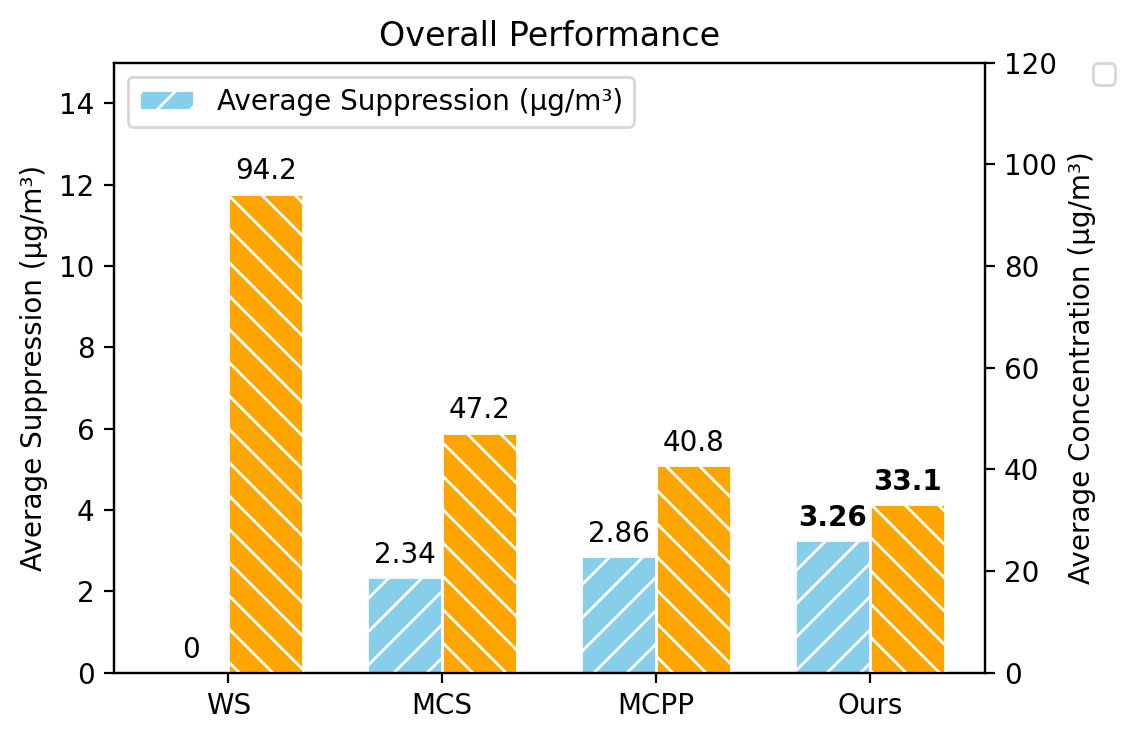

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['WS', 'MCS', 'MCPP', 'Ours']
Average_Suppression = [0, 2.34, 2.86, 3.26]
Average_Concentration = [94.2, 47.2, 40.8, 33.1]

x = np.arange(len(models))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(5.7, 3.8), dpi=200)
ax2 = ax1.twinx()

pm25_hatch = '//'
pm10_hatch = '\\\\'
edge_color = 'white'

ax1.bar(x - width/2, Average_Suppression, width, label='Average Suppression (μg/m³)',
        color='skyblue', hatch=pm25_hatch, edgecolor=edge_color)
ax2.bar(x + width/2, Average_Concentration, width, label='Average Concentration (μg/m³)',
        color='orange', hatch=pm10_hatch, edgecolor=edge_color)

ax1.set_ylabel('Average Suppression (μg/m³)')
ax2.set_ylabel('Average Concentration (μg/m³)')
ax1.set_title('Overall Performance')
ax1.set_xticks(x)
ax1.set_ylim([0, 15])
ax2.set_ylim([0, 120])
ax1.set_xticklabels(models)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# Move the legends to the top right corner and arrange them vertically
leg1 = ax1.legend(loc='upper left')
leg2 = ax2.legend(loc='upper right')

# Create a new legend combining both legends
leg = fig.legend([leg1, leg2], ['Average Suppression (μg/m³)', 'Average Concentration (μg/m³)'],
                 bbox_to_anchor=(1, 1), loc='upper right')
def autolabel(ax, values, offset):
    for i, value in enumerate(values):
        fontweight = 'bold' if models[i] == 'Ours' else 'normal'
        ax.annotate('{}'.format(value),
                    xy=(x[i] + offset, value),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight=fontweight)

autolabel(ax1, Average_Suppression, -width/2)
autolabel(ax2, Average_Concentration, width/2)

fig.tight_layout()
plt.show()